- By [lazarusA](https://lazarusa.github.io/Webpage/index.html)

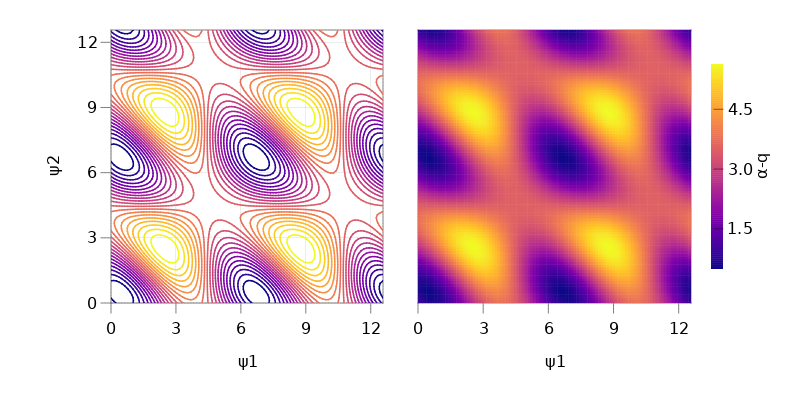

In [1]:
using CairoMakie, Random
include("makieTheme1.jl") # don't forget to include the theme. 

function tα_qubit(β, ψ1, ψ2, fα, f)
    2 + 2*β - cos(ψ1) - cos(ψ2) - 2*β*cos(π*fα)*cos(2*π*f + π*fα - ψ1- ψ2)
end
ψ1 = ψ2 = LinRange(0, 4*π, 100)
z = [tα_qubit(.61, x, y, 0.2, .1) for x in ψ1, y in ψ2]

fig = Figure(resolution = (800, 400))
ax1 = Axis(fig, aspect = 1, xlabel = "ψ1", ylabel = "ψ2", xtickalign = 0,  ytickalign = 0)
clines = contour!(ax1, ψ1, ψ2, z, colormap = :plasma, levels = 20, linewidth = 1.5)
limits!(ax1, 0, 4π, 0, 4π)
ax2 = Axis(fig, aspect = 1, xlabel = "ψ1", xtickalign = 0,  ytickalign = 0)
clines = heatmap!(ax2, ψ1, ψ2, z, colormap = :plasma)
limits!(ax2, 0, 4π, 0, 4π)
cbar = Colorbar(fig, clines, label ="α-q", labelpadding = 0, height = Relative(3/4))
fig[1, 1] = ax1
fig[1, 2] = ax2
fig[1, 3] = cbar
hideydecorations!(ax2)
#save("./results/FigContourUndHeat.svg", fig, pt_per_unit = 0.7);
save("./results/FigContourUndHeat.png", fig, px_per_unit = 2)
fig